In [16]:
from torch_batch_data import Human36M
from visualize_example import plot_frame
import numpy as np

In [2]:
1+1

2

In [3]:
dataset = Human36M(2, 1)

In [4]:
# for task in dataset:
#     print(task)
#     break

In [5]:
example = next(iter(dataset))

In [6]:
print(example[0].shape)

(2, 50, 51)


In [7]:
plot_ex = example[0]
print(plot_ex.shape)

(2, 50, 51)


Dictionary of Pose3D Data:  {'Pelvis': array([ 169.191, -175.703,  727.025], dtype=float32), 'RHip': array([  50.113476, -173.17587 ,  734.08887 ], dtype=float32), 'RKnee': array([  35.371593, -533.149   ,  502.5051  ], dtype=float32), 'RAnkle': array([  38.185757, -469.19507 ,   64.71654 ], dtype=float32), 'LHip': array([ 288.26767, -178.23012,  719.9612 ], dtype=float32), 'LKnee': array([ 320.8207 , -536.8692 ,  488.12708], dtype=float32), 'LAnkle': array([ 305.6989  , -480.0489  ,   49.607227], dtype=float32), 'Spine1': array([ 190.3739 , -217.82225,  946.3249 ], dtype=float32), 'Neck': array([ 163.96123, -236.14732, 1198.3384 ], dtype=float32), 'Head': array([ 176.86185, -340.72446, 1249.4634 ], dtype=float32), 'Site': array([ 171.47162, -298.26016, 1356.1986 ], dtype=float32), 'LShoulder': array([ 285.84442, -224.43153, 1124.2859 ], dtype=float32), 'LElbow': array([ 374.9254 , -227.18301,  875.1632 ], dtype=float32), 'LWrist': array([ 303.49017, -368.0145 ,  683.1331 ], dtype=floa

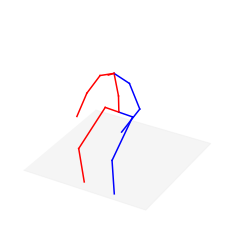

In [8]:
plot_frame(plot_ex[0][40].reshape(17, 3))

In [9]:
print(example[1].shape)

(2, 10, 51)


In [10]:
plot_ex[0][5].reshape(17, 3) == plot_ex[0][20].reshape(17, 3)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [17]:
def compute_similarity_transform(X, Y, compute_optimal_scale=False):
  """
  A port of MATLAB's `procrustes` function to Numpy.
  Adapted from http://stackoverflow.com/a/18927641/1884420
  Args
    X: array NxM of targets, with N number of points and M point dimensionality
    Y: array NxM of inputs
    compute_optimal_scale: whether we compute optimal scale or force it to be 1
  Returns:
    d: squared error after transformation
    Z: transformed Y
    T: computed rotation
    b: scaling
    c: translation
  """

  muX = X.mean(0)
  muY = Y.mean(0)

  X0 = X - muX
  Y0 = Y - muY

  ssX = (X0**2.).sum()
  ssY = (Y0**2.).sum()

  # centred Frobenius norm
  normX = np.sqrt(ssX)
  normY = np.sqrt(ssY)

  # scale to equal (unit) norm
  X0 = X0 / normX
  Y0 = Y0 / normY

  # optimum rotation matrix of Y
  A = np.dot(X0.T, Y0)
  U,s,Vt = np.linalg.svd(A,full_matrices=False)
  V = Vt.T
  T = np.dot(V, U.T)

  # Make sure we have a rotation
  detT = np.linalg.det(T)
  V[:,-1] *= np.sign( detT )
  s[-1]   *= np.sign( detT )
  T = np.dot(V, U.T)

  traceTA = s.sum()

  if compute_optimal_scale:  # Compute optimum scaling of Y.
    b = traceTA * normX / normY
    d = 1 - traceTA**2
    Z = normX*traceTA*np.dot(Y0, T) + muX
  else:  # If no scaling allowed
    b = 1
    d = 1 + ssY/ssX - 2 * traceTA * normY / normX
    Z = normY*np.dot(Y0, T) + muX

  c = muX - b*np.dot(muY, T)

  return d, Z, T, b, c

In [21]:
test_example = example[1][0].reshape((10, 17, 3))
print(test_example.shape)
d, Z, T, b, c = compute_similarity_transform(test_example[1], test_example[0])

(10, 17, 3)


In [24]:
print(test_example[0])

[[ 173.435    -171.68      724.008   ]
 [  54.40056  -170.36113   732.0581  ]
 [  33.173183 -531.66266   503.06104 ]
 [  38.14502  -469.69687    65.0058  ]
 [ 292.4686   -172.99886   715.95795 ]
 [ 320.52673  -534.35016   487.77664 ]
 [ 304.9072   -480.3496     48.91809 ]
 [ 186.93733  -197.58617   946.41    ]
 [ 173.19972  -205.2052   1199.9794  ]
 [ 179.77318  -311.25067  1249.2512  ]
 [ 170.95155  -267.01074  1355.0325  ]
 [ 293.30518  -196.86652  1122.6381  ]
 [ 378.90753  -222.16437   873.565   ]
 [ 309.16425  -365.64972   682.8823  ]
 [  46.276966 -203.2863   1133.9197  ]
 [-103.015854 -290.251     933.5368  ]
 [  13.29765  -508.28098   960.8533  ]]


In [25]:
print(Z)

[[ 172.44647  -171.63655   724.76025 ]
 [  53.42531  -171.33109   733.10364 ]
 [  34.736786 -533.04504   504.5368  ]
 [  38.095917 -471.5052     66.40619 ]
 [ 291.4668   -171.942     716.417   ]
 [ 322.06427  -533.28174   488.54398 ]
 [ 304.89923  -479.88446    49.669373]
 [ 186.71925  -197.18909   947.155   ]
 [ 173.673    -204.65588  1200.7655  ]
 [ 181.27841  -310.5885   1250.1316  ]
 [ 172.3381   -266.31335  1355.8881  ]
 [ 293.5113   -195.3687   1123.1184  ]
 [ 378.7132   -220.1958    873.8608  ]
 [ 309.73462  -364.4775    683.5011  ]
 [  46.575912 -203.897    1135.0182  ]
 [-102.45834  -292.35345   935.0963  ]
 [  15.790314 -509.34763   962.35223 ]]
